In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

## Inpatient

In [2]:
tr_in = pd.read_csv('Train_Inpatientdata-1542865627584.csv')
print(tr_in.shape)
tr_in.head()

(40474, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [3]:
tr_in['Inpatient'] = 1
tr_in['Outpatient'] = 0

In [9]:
tr_in['ClaimStartDt'] = pd.to_datetime(tr_in['ClaimStartDt'])
tr_in['ClaimEndDt'] = pd.to_datetime(tr_in['ClaimEndDt'])

In [11]:
(tr_in['ClaimEndDt'][0] - tr_in['ClaimStartDt'][0]).days

6

In [13]:
tr_in['Claim_Days_Elapsed'] = (tr_in['ClaimEndDt'] - tr_in['ClaimStartDt']).dt.days

In [14]:
print(len(tr_in.columns))
tr_in.columns

33


Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Inpatient', 'Outpatient', 'Claim_Days_Elapsed'],
      dtype='object')

In [15]:
tr_in.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Inpatient,Outpatient,Claim_Days_Elapsed
count,40474.000000,39575.0,23148.000000,5454.000000,965.000000,116.000000,9.000000,0.0,40474.0,40474.0,40474.000000
mean,10087.884074,1068.0,5894.611759,4103.738174,4226.355440,4070.172414,5269.444444,NaN,1.0,0.0,5.660251
std,10303.099402,0.0,3049.304400,2028.182156,2282.761581,1994.409802,2780.071632,NaN,0.0,0.0,5.628873
min,0.000000,1068.0,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN,1.0,0.0,0.000000
25%,4000.000000,1068.0,3848.000000,2724.000000,2724.000000,2758.750000,4139.000000,NaN,1.0,0.0,2.000000
50%,7000.000000,1068.0,5369.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN,1.0,0.0,4.000000
75%,12000.000000,1068.0,8666.250000,4439.000000,5185.000000,4439.000000,5185.000000,NaN,1.0,0.0,7.000000
max,125000.000000,1068.0,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN,1.0,0.0,36.000000


In [7]:
len(tr_in.Provider.unique())

2092

In [8]:
tr_in.Provider.value_counts()

PRV52019    516
PRV55462    386
PRV54367    322
PRV53706    282
PRV55209    275
PRV56560    248
PRV54742    231
PRV55230    225
PRV52340    224
PRV51501    223
PRV56416    214
PRV52135    210
PRV54955    205
PRV51244    200
PRV51560    200
PRV54765    196
PRV53808    195
PRV51940    193
PRV57191    185
PRV52021    181
PRV52846    175
PRV52821    173
PRV55194    169
PRV52903    167
PRV52120    165
PRV52100    164
PRV51390    164
PRV51146    162
PRV52123    162
PRV51471    161
           ... 
PRV54411      1
PRV52699      1
PRV56038      1
PRV54531      1
PRV53398      1
PRV56341      1
PRV54697      1
PRV57728      1
PRV51947      1
PRV51642      1
PRV57650      1
PRV51681      1
PRV51554      1
PRV53516      1
PRV52970      1
PRV57110      1
PRV52518      1
PRV51931      1
PRV55151      1
PRV55156      1
PRV53449      1
PRV54590      1
PRV54932      1
PRV55258      1
PRV56752      1
PRV56540      1
PRV51635      1
PRV54679      1
PRV57115      1
PRV56762      1
Name: Provider, Length: 

In [19]:
top_prov = tr_in['Claim_Days_Elapsed'][tr_in['Provider']=='PRV52019']
top_prov

46        2
177       3
270       4
437       4
452       1
561       5
679       4
722       4
846       3
877       5
930       9
1119     35
1149     31
1187     16
1267      9
1636      0
1657      6
1821      7
1963      6
2092      7
2326      8
2504      3
2520      7
2551      4
2568      8
2591      3
2592      1
2608      2
2611      5
2612     13
         ..
37991     4
38096    10
38326    23
38339     1
38452     7
38541     3
38624     2
38702     3
38794     3
38808     2
38820    20
38845     6
39199     2
39363     2
39388     3
39423     2
39439     3
39480    14
39610    33
39611     2
39612    36
39692    21
39807     2
39833     3
40045     9
40163    10
40185     4
40200     3
40305     1
40422     5
Name: Claim_Days_Elapsed, Length: 516, dtype: int64

Text(0.5, 1.0, 'Top Provider vs Claim Days Elapsed')

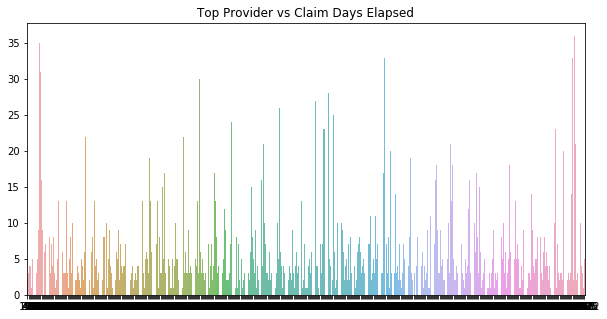

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(top_prov.index, top_prov.values, alpha=0.8)
plt.title('Top Provider vs Claim Days Elapsed')

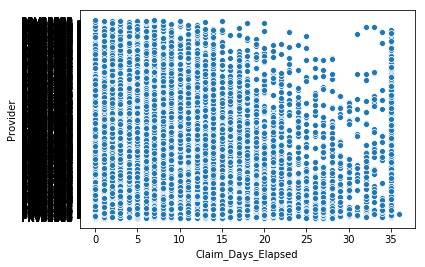

In [24]:
sns.scatterplot(x=tr_in['Claim_Days_Elapsed'], y=tr_in['Provider'])

## Outpatient

In [8]:
tr_ben = pd.read_csv('tr_ben.csv')

In [9]:
tr_inout = pd.concat([tr_ben, tr_in], join="outer", axis=0)
print("Rows: {}".format(len(tr_inout)))
print("Columns: {}".format(len(tr_inout.columns)))
tr_inout

/Users/fhel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


Rows: 179030
Columns: 58


,AdmissionDt,Age,AttendingPhysician,BeneID,ChronicCond_Alzheimer,ChronicCond_Cancer,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_Heartfailure,ChronicCond_IschemicHeart,...,NoOfMonths_PartBCov,OPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OperatingPhysician,OtherPhysician,Outpatient,Provider,Race,RenalDiseaseIndicator,State
0,NaN,67.0,NaN,BENE11001,1.0,2.0,1.0,1.0,2.0,1.0,...,12.0,70.0,60.0,NaN,NaN,NaN,NaN,1.0,0,39.0
1,NaN,73.0,NaN,BENE11002,2.0,2.0,2.0,2.0,2.0,2.0,...,12.0,50.0,30.0,NaN,NaN,NaN,NaN,1.0,0,39.0
2,NaN,73.0,NaN,BENE11003,1.0,2.0,2.0,2.0,2.0,1.0,...,12.0,40.0,90.0,NaN,NaN,NaN,NaN,1.0,0,52.0
3,NaN,87.0,NaN,BENE11004,1.0,2.0,2.0,1.0,1.0,1.0,...,12.0,760.0,1810.0,NaN,NaN,NaN,NaN,1.0,0,39.0
4,NaN,74.0,NaN,BENE11005,2.0,2.0,2.0,1.0,2.0,2.0,...,12.0,1200.0,1790.0,NaN,NaN,NaN,NaN,1.0,0,24.0
5,NaN,33.0,NaN,BENE11006,2.0,2.0,2.0,2.0,2.0,2.0,...,12.0,0.0,500.0,NaN,NaN,NaN,NaN,1.0,0,23.0
6,NaN,69.0,NaN,BENE11007,1.0,2.0,2.0,1.0,1.0,2.0,...,12.0,160.0,1490.0,NaN,NaN,NaN,NaN,2.0,0,45.0
7,NaN,76.0,NaN,BENE11008,2.0,2.0,2.0,1.0,2.0,2.0,...,12.0,0.0,30.0,NaN,NaN,NaN,NaN,1.0,0,15.0
8,NaN,81.0,NaN,BENE11009,2.0,2.0,2.0,1.0,1.0,2.0,...,12.0,0.0,100.0,NaN,NaN,NaN,NaN,1.0,Y,44.0
9,NaN,73.0,NaN,BENE11010,2.0,1.0,2.0,1.0,1.0,1.0,...,12.0,660.0,1170.0,NaN,NaN,NaN,NaN,1.0,0,41.0
